4. Los siguientes datos fueron tomados a lo largo de una transecta que atraviesa un contacto vertical.
Interprete la forma de la curva de tiempo de viaje y explique lo que significa. Luego determine, hasta
donde sea posible, las velocidades, espesores de capas, y la localización del contacto vertical.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
pip install spicy

In [3]:
#Distancia desde el sitio de disparo
d = []
for i in range(10,130,10):
  d.append(i)

#Tiempo perfil (ms)
t1 = [33.6, 66.7, 100, 111.4, 114.3, 117.3, 120.2, 123.1, 133.6, 138.9, 144.1, 149.4]

#Tiempo contraperfil (ms)
t21 = [33.3, 66.7, 100, 119.8, 125.1, 134.1, 137, 140, 142.9, 145.8, 148.8, 151.7]
t2=t21[::-1]

print(d)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]


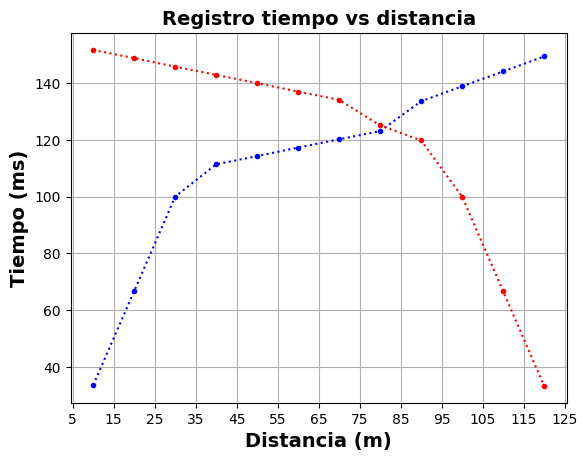

In [4]:
plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')

plt.plot(d,t1, marker='.', linestyle = ':', color='blue')
plt.plot(d,t2, marker='.', linestyle = ':', color='red')

plt.xticks(np.arange(5, 135, step=10))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))
#plt.yticks(np.arange(0, 90, step=10))
plt.grid('true')


plt.show()

In [5]:
#Down-DIP
od_d1 = d[0:3]      #Distancias correspondientes a la onda directa Down-Dip
od_t1 = t1[0:3]     #Tiempos correspondientes a la onda directa Down-Dip
oc_d1 = d[2:8]     #Distancias correspondientes a la onda críticamente refractada Down-Dip (Frontera 2)
oc_t1 = t1[2:8]    #Tiempos correspondientes a la onda críticamente refractada Down-Dip
oc_d2 = d[7:13]    #Distancias correspondientes a la onda críticamente refractada Down-Dip (Frontera 3)
oc_t2 = t1[7:13]   #Tiempos correspondientes a la onda críticamente refractada Down-Dip

#Up-DIP
od_du1 = d[8:13]   #Distancias correspondientes a la onda directa Up-Dip
od_tu1 = t2[8:13]  #Tiempos correspondientes a la onda directa Up-Dip
oc_du1 = d[6:9]    #Distancias correspondientes a la onda críticamente refractada Up-Dip (Frontera 2)
oc_tu1 = t2[6:9]   #Tiempos correspondientes a la onda críticamente refractada Up-Dip
oc_du2 = d[0:7]     #Distancias correspondientes a la onda críticamente refractada Up-Dip (Frontera 3)
oc_tu2 = t2[0:7]    #Tiempos correspondientes a la onda críticamente refractada Up-Dip

In [6]:
from spicy import stats
#PERFIL
# Realiza una regresión lineal para el primer par de datos (X,Y)
mf1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(od_d1, od_t1)
# Realiza una regresión lineal para el segundo par de datos
mf2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(oc_d1, oc_t1)
# Realiza una regresión lineal para el tercer par de datos
mf3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(oc_d2, oc_t2)

#CONTRA PERFIL
# Realiza una regresión lineal para el primer par de datos (X,Y)
mc1, intercept4, r_value4, p_value4, std_err4 = stats.linregress(od_du1,od_tu1)
# Realiza una regresión lineal para el segundo par de datos
mc2, intercept5, r_value5, p_value5, std_err5 = stats.linregress(oc_du1, oc_tu1)
# Realiza una regresión lineal para el tercer par de datos
mc3, intercept6, r_value6, p_value6, std_err6 = stats.linregress(oc_du2, oc_tu2)

print('PERFIL')
print('Direct Wave:','md=',mf1, 'bp=',intercept1, r_value1, p_value1, std_err1)
print()
print('Critical refracted wave 1:', 'm1=',mf2, 'b1=',intercept2, r_value2, p_value2, std_err2)
print()
print()
print('CCONTRAPERFIL')
print('Direct Wave:','mu=',mc1, 'bc=',intercept4, r_value4, p_value4, std_err4)
print()
print('Critical refracted wave 3:', 'm3=',mc2, 'b3=',intercept5, r_value5, p_value5, std_err5)
print()

PERFIL
Direct Wave: md= 3.3200000000000003 bp= 0.36666666666666003 0.9999984879310436 0.0011070850193850108 0.0057735026918266106

Critical refracted wave 1: m1= 0.4139999999999999 b1= 91.61333333333334 0.9474923484811101 0.004063197000684662 0.06986244989092436


CCONTRAPERFIL
Direct Wave: mu= -2.928 bc= 387.39 -0.9936207840351243 0.006379215964875673 0.2349851059109905

Critical refracted wave 3: m3= -0.715 b3= 183.53333333333333 -0.9890254999266049 0.09440293040095127 0.10680979980007997



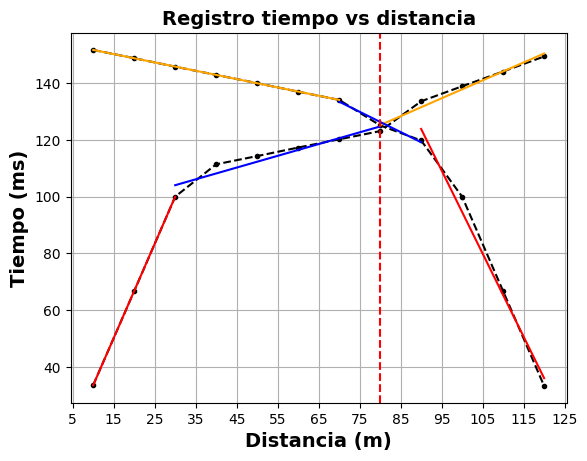

In [7]:
#Grafica de Perfil y Contraperfil
plt.plot(d,t1, marker='.', linestyle = '--', color='black')
plt.plot(d,t2, marker='.', linestyle = '--', color='black')
#DOWN - DIP
od_dd1 = np.array(d[0:3])       #Todas los valores que puede tomar la x para la recta y1
oc_dd1 = np.array(d[2:8])      #Todas los valores que puede tomar la x para la recta y2
oc_dd2 = np.array(d[7:13])     #Todas los valores que puede tomar la x para la recta y3


y1= mf1*od_dd1 + intercept1                                      #Ecuacion de la Onda Directa Down Dip
plt.plot(od_dd1, y1, color="red", label="Recta de Regresión")
y2= mf2*oc_dd1 + intercept2                                      #Ecuacion de la Onda criticamente refractada Down Dip FRONTERA 2
plt.plot(oc_dd1, y2, color="blue", label="Recta de Regresión")
y3= mf3*oc_dd2 + intercept3                                       #Ecuacion de la Onda criticamente refractada Down Dip FRONTERA 3
plt.plot(oc_dd2, y3, color="orange", label="Recta de Regresión")


#UP - DIP
od_dup0 = np.array(d[8:13])
oc_dup1 = np.array(d[6:9])
oc_dup2 = np.array(d[0:7])

y4= mc1*od_dup0 + intercept4                                     #Ecuacion de la Onda Directa Up Dip
plt.plot(od_dup0, y4, color="red", label="Recta de Regresión")
y5= mc2*oc_dup1 + intercept5                                     #Ecuacion de la Onda criticamente refractada Up Dip FRONTERA 2
plt.plot(oc_dup1, y5, color="blue", label="Recta de Regresión")
y6= mc3*oc_dup2 + intercept6                                     #Ecuacion de la Onda criticamente refractada Up Dip FRONTERA 3
plt.plot(oc_dup2, y6, color="orange", label="Recta de Regresión")


# Graphic
plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')

plt.axvline(x=80, color='red', linestyle='--', label='Línea vertical')

plt.xticks(np.arange(5, 135, step=10))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))
#plt.yticks(np.arange(0, 90, step=10))
plt.grid('true')

plt.show()

Note que el contraste vertical se da de derecha a izquierda, es decir, pasa de V2 a V1. A perfil pasa esto, pero a contra perfil no

#SOLO PARA CÁLCULOS

In [8]:
#Distancia desde el sitio de disparo
d = []
for i in range(10,130,10):
  d.append(i)

#Tiempo perfil (ms)
t1 = [33.6, 66.7, 100, 111.4, 114.3, 117.3, 120.2, 123.1, 133.6, 138.9, 144.1, 149.4]

#Tiempo contraperfil (ms)
t2 = [33.3, 66.7, 100, 119.8, 125.1, 134.1, 137, 140, 142.9, 145.8, 148.8, 151.7]


In [ ]:
plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')

plt.plot(d,t1, marker='.', linestyle = '', color='blue')
plt.plot(d,t2, marker='.', linestyle = '', color='red')

plt.xticks(np.arange(5, 140, step=10))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))
#plt.yticks(np.arange(0, 90, step=10))
plt.grid('true')

plt.show()

In [10]:
#Down-DIP
od_d1 = d[0:3]      #Distancias correspondientes a la onda directa Down-Dip
od_t1 = t1[0:3]     #Tiempos correspondientes a la onda directa Down-Dip
oc_d1 = d[2:8]     #Distancias correspondientes a la onda críticamente refractada Down-Dip (Frontera 2)
oc_t1 = t1[2:8]    #Tiempos correspondientes a la onda críticamente refractada Down-Dip
oc_d2 = d[7:13]    #Distancias correspondientes a la onda críticamente refractada Down-Dip (Frontera 3)
oc_t2 = t1[7:13]   #Tiempos correspondientes a la onda críticamente refractada Down-Dip

#Up-DIP
od_du1 = d[0:3]   #Distancias correspondientes a la onda directa Up-Dip
od_tu1 = t2[0:3]  #Tiempos correspondientes a la onda directa Up-Dip
oc_du1 = d[2:8]    #Distancias correspondientes a la onda críticamente refractada Up-Dip (Frontera 2)
oc_tu1 = t2[2:8]   #Tiempos correspondientes a la onda críticamente refractada Up-Dip
oc_du2 = d[7:13]     #Distancias correspondientes a la onda críticamente refractada Up-Dip (Frontera 3)
oc_tu2 = t2[7:13]    #Tiempos correspondientes a la onda críticamente refractada Up-Dip

In [11]:
from spicy import stats
#PERFIL
# Realiza una regresión lineal para el primer par de datos (X,Y)
mf1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(od_d1, od_t1)
# Realiza una regresión lineal para el segundo par de datos
mf2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(oc_d1, oc_t1)
# Realiza una regresión lineal para el tercer par de datos
mf3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(oc_d2, oc_t2)

#CONTRA PERFIL
# Realiza una regresión lineal para el primer par de datos (X,Y)
mc1, intercept4, r_value4, p_value4, std_err4 = stats.linregress(od_du1,od_tu1)
# Realiza una regresión lineal para el segundo par de datos
mc2, intercept5, r_value5, p_value5, std_err5 = stats.linregress(oc_du1, oc_tu1)
# Realiza una regresión lineal para el tercer par de datos
mc3, intercept6, r_value6, p_value6, std_err6 = stats.linregress(oc_du2, oc_tu2)

print('PERFIL')
print('Direct Wave:','md=',mf1,'             ','bp=',intercept1, r_value1, p_value1, std_err1)
print()
print('Critical refracted wave 1:', 'm1=',mf2, '            b1=',intercept2, r_value2, p_value2, std_err2)
print()
print('Critical refracted wave 2:', 'm2=',mf3, 'b2=',intercept3, r_value3, p_value3, std_err3)
print()
print('CCONTRAPERFIL')
print('Direct Wave:','mu=',mc1,'             ','bc=',intercept4, r_value4, p_value4, std_err4)
print()
print('Critical refracted wave 3:', 'm3=',mc2, 'b3=',intercept5, r_value5, p_value5, std_err5)
print()
print('Critical refracted wave 4:', 'm4=',mc3, 'b4=',intercept6, r_value6, p_value6, std_err6)

PERFIL
Direct Wave: md= 3.3200000000000003               bp= 0.36666666666666003 0.9999984879310436 0.0011070850193850108 0.0057735026918266106

Critical refracted wave 1: m1= 0.4139999999999999             b1= 91.61333333333334 0.9474923484811101 0.004063197000684662 0.06986244989092436

Critical refracted wave 2: m2= 0.6310000000000002 b2= 74.71999999999997 0.9864337316245881 0.0018929481772483965 0.0606272765895572

CCONTRAPERFIL
Direct Wave: mu= 3.3350000000000004               bc= -0.03333333333333144 0.9999996253749294 0.0005510532311743085 0.0028867513462981736

Critical refracted wave 3: m3= 0.7445714285714287 b3= 85.04857142857142 0.9400520705716724 0.005282912301252242 0.1350573574297913

Critical refracted wave 4: m4= 0.2929999999999998 b4= 116.54000000000002 0.9999825279189282 8.76697308973764e-08 0.0010000000000017469


In [ ]:
#Grafica de Perfil y Contraperfil

#DOWN - DIP
od_dd1 = np.array(d[0:3])       #Todas los valores que puede tomar la x para la recta y1
oc_dd1 = np.array(d[2:8])      #Todas los valores que puede tomar la x para la recta y2
oc_dd2 = np.array(d[7:13])     #Todas los valores que puede tomar la x para la recta y3

y1= mf1*od_dd1 + intercept1                                      #Ecuacion de la Onda Directa Down Dip
plt.plot(od_dd1, y1, color="red", label="Recta de Regresión")
y2= mf2*oc_dd1 + intercept2                                      #Ecuacion de la Onda criticamente refractada Down Dip FRONTERA 2
plt.plot(oc_dd1, y2, color="blue", label="Recta de Regresión")
y3= mf3*oc_dd2 + intercept3                                       #Ecuacion de la Onda criticamente refractada Down Dip FRONTERA 3
plt.plot(oc_dd2, y3, color="orange", label="Recta de Regresión")

#UP - DIP
od_dup0 = np.array(d[0:3])
oc_dup1 = np.array(d[2:8])
oc_dup2 = np.array(d[7:13])

y4= mc1*od_dup0 + intercept4                                     #Ecuacion de la Onda Directa Up Dip
plt.plot(od_dup0, y4, color="red", label="Recta de Regresión")
y5= mc2*oc_dup1 + intercept5                                     #Ecuacion de la Onda criticamente refractada Up Dip FRONTERA 2
plt.plot(oc_dup1, y5, color="blue", label="Recta de Regresión")
y6= mc3*oc_dup2 + intercept6                                     #Ecuacion de la Onda criticamente refractada Up Dip FRONTERA 3
plt.plot(oc_dup2, y6, color="orange", label="Recta de Regresión")

# Graphic
plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')

#plt.plot(d,t1, marker='*', linestyle = '', color='blue')

plt.xticks(np.arange(5, 140, step=10))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))
#plt.yticks(np.arange(0, 90, step=10))
plt.grid('true')

plt.show()

In [13]:
#velocidad de onda directa en perfil (izquierda derecha) UP DIP
velu1=abs(round((1/mf1),3))
velu2=abs(round((1/mf2),3))
velu3=abs(round((1/mf3),3))

#velocidad de onda directa contraperfil (derecha izquierda) DOWN DIP
veld1=abs(round((1/mc1),3))
veld2=abs(round((1/mc2),3))
veld3=abs(round((1/mc3),3))


print('Perfil down dip')
print('Velocidad onda directa, v1=', velu1, 'm/ms')
print('Velocidad de contraste lateral frontera 1, v2:', velu2,'m/ms')
print('Velocidad de contraste lateral frontera 1, v2":', velu3,'m/ms')
print()
print('Contraperfil up dip')
print('Velocidad onda directa, v1:', veld1, 'm/ms')
print('Velocidad de contraste lateral frontera 1, v2":', veld2,'m/ms')
print('Velocidad de contraste lateral frontera 1, v2:', veld3,'m/ms')
print()
print('V1=',(velu1+veld1)/2)

Perfil down dip
Velocidad onda directa, v1= 0.301 m/ms
Velocidad de contraste lateral frontera 1, v2: 2.415 m/ms
Velocidad de contraste lateral frontera 1, v2": 1.585 m/ms

Contraperfil up dip
Velocidad onda directa, v1: 0.3 m/ms
Velocidad de contraste lateral frontera 1, v2": 1.343 m/ms
Velocidad de contraste lateral frontera 1, v2: 3.413 m/ms

V1= 0.3005


In [14]:
v1= (veld1+velu1)/2

In [15]:
#Buzamiento de fronteras (segun el punto, las fronteras son paralelas)
buz=np.degrees(0)

In [16]:
#Angulo de refracción critica de la *primera* frontera (Perfil ~ UP DIP(Contra del buza))
i11 = (np.arcsin(v1/velu2)-buz)
#Angulo de incidencia en la primera frontera y de refracción crítica en la *segunda* frontera (Perfil ~ UP DIP(Contra del buza))


#Angulo de la *primera* refraccion critica (Contraperfil ~ dOWN DIP(Favor del buza))
i11c = np.arcsin(v1/veld2)+buz
#Angulo de la *segunda* refraccion critica (Contraperfil ~ dOWN DIP(Favor del buza))

In [17]:
v2=v1/np.sin(i11)
#v3=v1/np.sin(i12)

#Angulo de refracción critica en la *segunda* frontera (Perfil ~ UP DIP(Contra del buza)

NameError: name 'i12' is not defined

In [18]:
#Espesores a Perfil
#capa 1
espp1=(v1*intercept2)/(2*np.cos(i11))
#espp2= (((intercept3*v2)/2)-(espp1*np.cos(i12)))*(1/np.cos(i22))
espp2=espp1-np.sin(buz)*d[-1]
#Espesores a ContraPerfil
#capa 2
espc1=(v1*intercept5)/(2*np.cos(i11))
#espc2= (((intercept6*v2)/2)-(espc1*np.cos(i12)))*(1/np.cos(i22))
espc2=espc1-np.sin(buz)*d[-1]

In [19]:
print("Buzamiento de la Primera y Segunda Frontera:", abs(round(np.degrees(buz), 3)), "°", sep= ' ')
print()
print('Perfil ~ UP DIP(Contra del buzamiento)')
print("Refracción crítica en la Primera frontera                           i11:", round(np.degrees(i11), 3), "°", sep= ' ')
print("Angulo de refracción en la primera frontera y crítica en la segunda i12:", round(np.degrees(i12), 3), "°", sep= ' ')
print("Refracción critica en la segunda frontera                           i22:", round(np.degrees(i22), 3), "°", sep= ' ')
print()
print('Contraperfil ~ dOWN DIP(Favor del buzamiento)')
print("Refracción crítica en la Primera frontera                           i11c:", round(np.degrees(i11c), 3), "°", sep= ' ')
print('Angulo de refracción en la primera frontera y crítica en la segunda i12c:', round(np.degrees(i12c), 3), "°", sep= ' ')
print("Refracción critica en la segunda frontera                            i22:", round(np.degrees(i22), 3), "°", sep= ' ')
print()
print('Velocidad sobre la frontera 1, v1=',round(v1,3), "m/ms", sep= ' ')
print('Velocidad sobre la frontera 2, v2=',round(v2,3), "m/ms", sep= ' ')
print('Velocidad bajo la frontera 2, v3=',round(v3,3), "m/ms", sep= ' ')
print()
print('Espesor hasta la capa 1 en perfil,       h1"=',round(espp1,3), "m", sep= ' ')
print('Espesor hasta la capa 2 en perfil,       h2"=',round(espp2,3), "m", sep= ' ')
print()
print('Espesor hasta la capa 1 en Contraperfil, h1=',round(espc1,3), "m", sep= ' ')
print('Espesor hasta la capa 2 en Contraperfil, h2=',round(espc2,3), "m", sep= ' ')
print()
print('Espesor promedio de la capa 1            H1 =',round((espc1+espp1)/2,3)        )
print('Espesor real de la capa 2                H2 =',round((espp2-espp1),3)        )


Buzamiento de la Primera y Segunda Frontera: 0.0 °

Perfil ~ UP DIP(Contra del buzamiento)
Refracción crítica en la Primera frontera                           i11: 7.148 °


NameError: name 'i12' is not defined